# Climate-Driven Disease Outbreak Prediction 

## Importing Libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## Load The Dataset

In [46]:
df = pd.read_csv("../Data/climate_disease_dataset.csv")

## Explore The Dataset

In [47]:
# Check first few rows
print("Preview of dataset:")
display(df.head())

Preview of dataset:


,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,American Samoa,East,24.046880,275.221450,32.664808,10.092419,7,36,289,4667
1,2000,2,American Samoa,East,27.865871,257.518897,6.549863,9.489863,136,120,289,4667
2,2000,3,American Samoa,East,27.185394,118.270513,26.385328,12.000000,53,79,289,4667
3,2000,4,American Samoa,East,25.036525,179.148943,12.735504,12.000000,34,82,289,4667
4,2000,5,American Samoa,East,24.675325,228.473663,10.127494,12.000000,85,128,289,4667


In [48]:
# Info about columns and datatypes
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                34560 non-null  int64  
 1   month               34560 non-null  int64  
 2   country             34560 non-null  object 
 3   region              34560 non-null  object 
 4   avg_temp_c          34560 non-null  float64
 5   precipitation_mm    34560 non-null  float64
 6   air_quality_index   34560 non-null  float64
 7   uv_index            34560 non-null  float64
 8   malaria_cases       34560 non-null  int64  
 9   dengue_cases        34560 non-null  int64  
 10  population_density  34560 non-null  int64  
 11  healthcare_budget   34560 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB
None


In [49]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,year,month,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
count,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000
mean,2011.500000,6.500000,20.395234,192.667977,43.787766,10.210855,70.519560,75.941464,266.900000,2764.650000
std,6.922287,3.452102,8.410940,90.503990,33.079697,1.936540,46.130774,37.323807,136.001073,1418.119148
min,2000.000000,1.000000,-2.557056,0.000000,0.000000,0.870704,0.000000,0.000000,50.000000,205.000000
25%,2005.750000,3.750000,14.404089,124.641424,15.322767,8.921094,32.000000,48.000000,136.250000,1435.500000
50%,2011.500000,6.500000,20.351749,195.315309,40.685931,10.760990,69.000000,76.000000,277.500000,2859.000000
75%,2017.250000,9.250000,26.342978,260.147603,68.402041,12.000000,107.000000,104.000000,384.750000,3996.750000
max,2023.000000,12.000000,44.583564,485.704079,168.847690,12.000000,201.000000,181.000000,498.000000,4969.000000


In [50]:
# Missing values check
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
year                  0
month                 0
country               0
region                0
avg_temp_c            0
precipitation_mm      0
air_quality_index     0
uv_index              0
malaria_cases         0
dengue_cases          0
population_density    0
healthcare_budget     0
dtype: int64


In [51]:
#Rows and columns
print(df.shape)

(34560, 12)


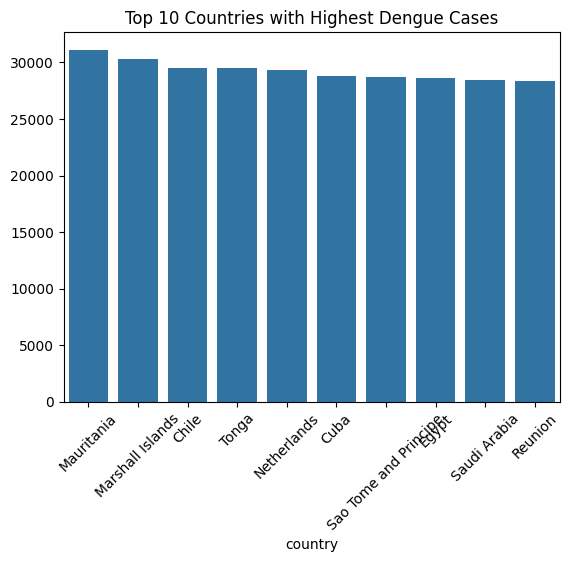

In [52]:
#Univariate Varible
# Top 10 Countries with Most Cases 
top10 = df.groupby("country")["dengue_cases"].sum().nlargest(10)
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Countries with Highest Dengue Cases")
plt.xticks(rotation=45)
plt.show()

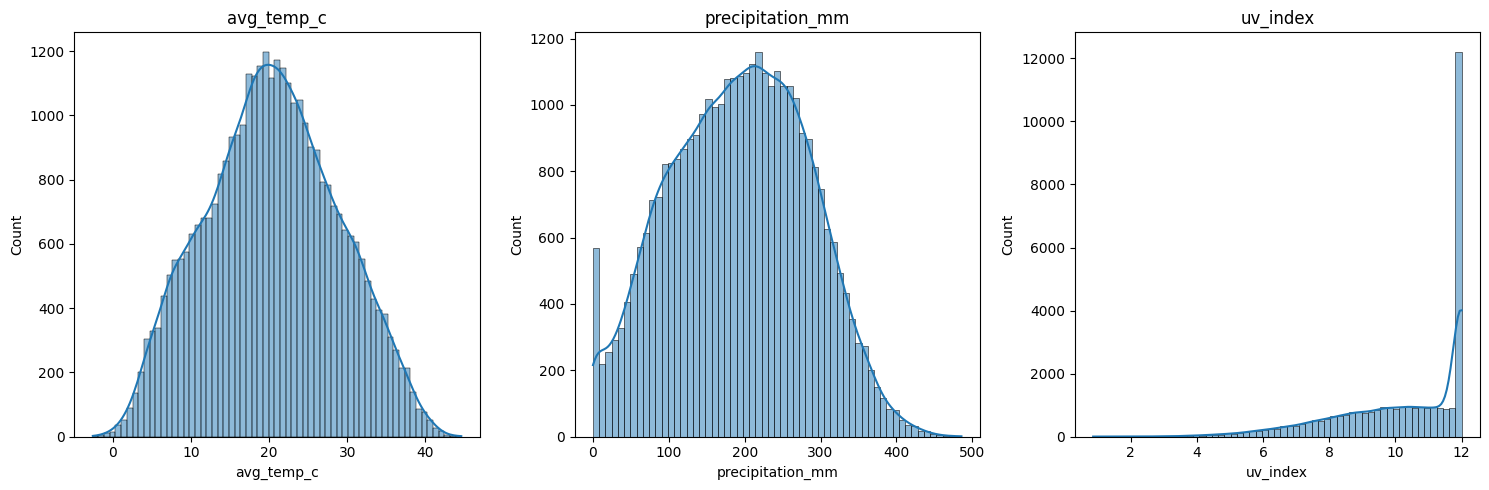

In [53]:
num_cols = ["avg_temp_c", "precipitation_mm", "uv_index"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='dengue_cases', ylabel='avg_temp_c'>

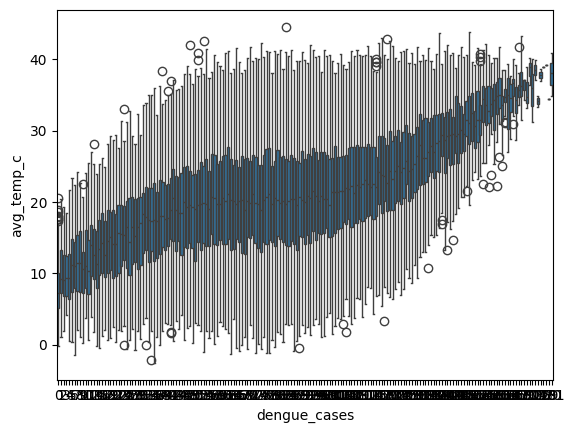

In [54]:
#Bivariate Analysis
sns.boxplot(x="dengue_cases", y="avg_temp_c", data=df)

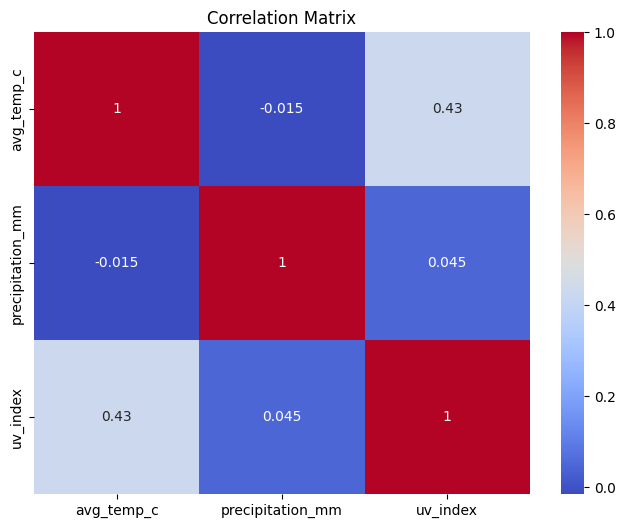

In [55]:
#Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

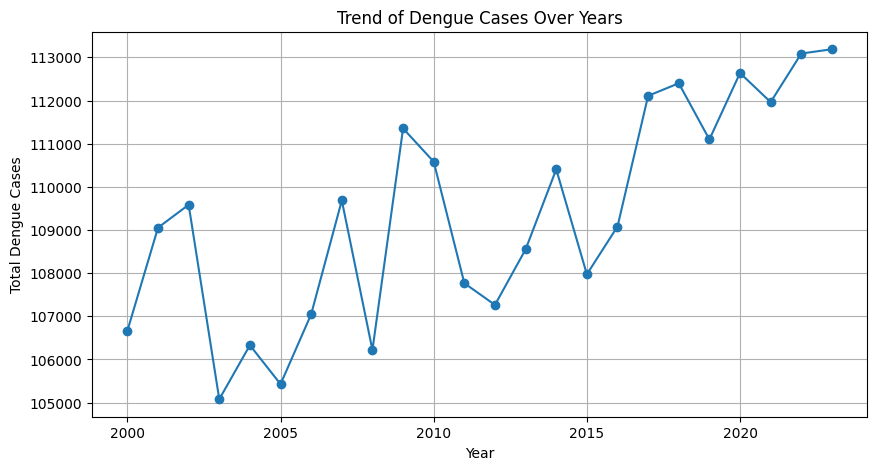

In [56]:
# Trend of Dengue Cases over Years
yearly_dengue = df.groupby("year")["dengue_cases"].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_dengue.index, yearly_dengue.values, marker="o")
plt.title("Trend of Dengue Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.grid(True)
plt.show()

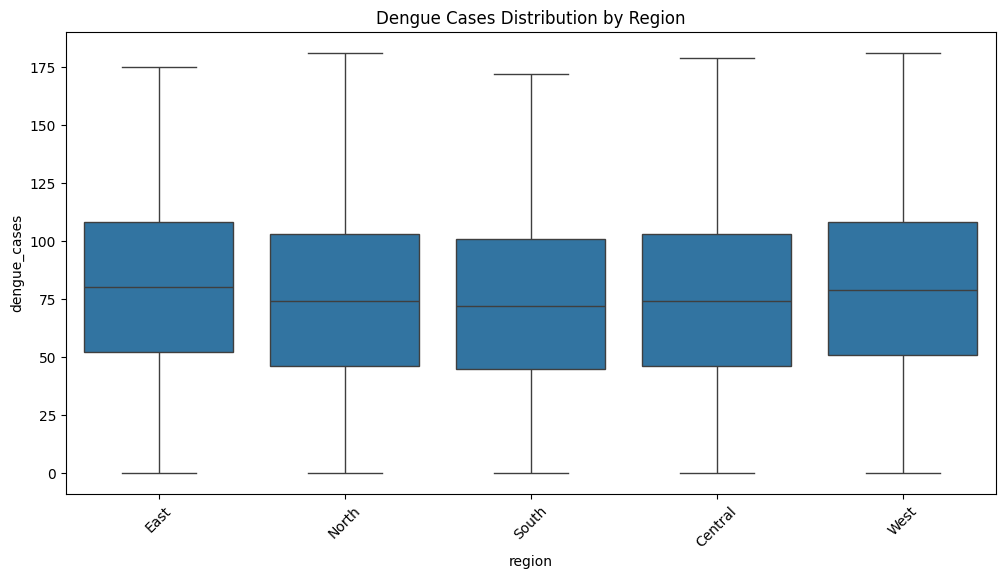

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x="region", y="dengue_cases", data=df)
plt.xticks(rotation=45)
plt.title("Dengue Cases Distribution by Region")
plt.show()

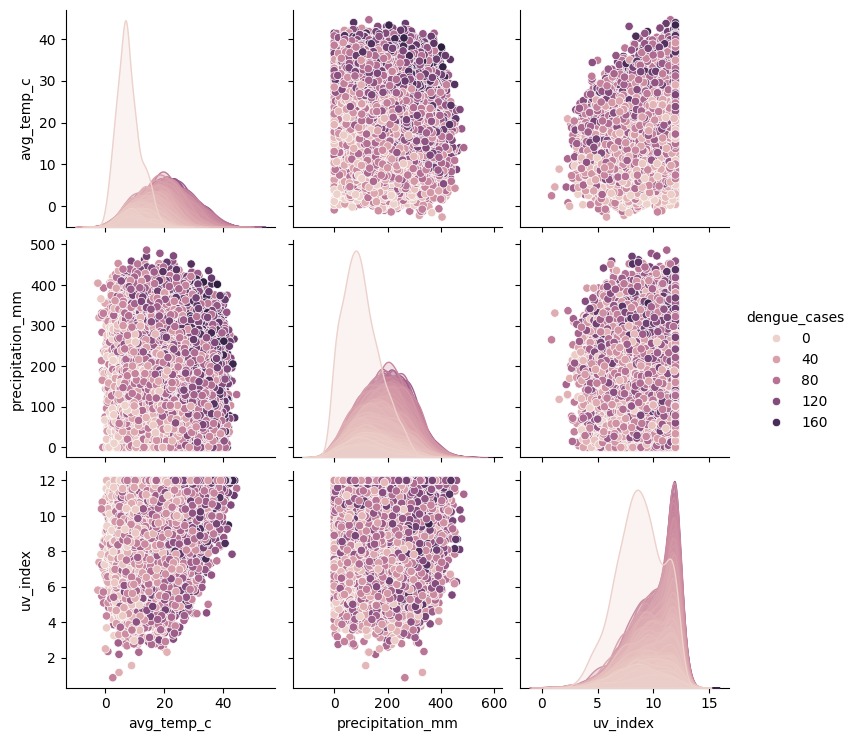

In [58]:
#Pair Plot
sns.pairplot(df, vars=num_cols, hue="dengue_cases")
plt.show()

In [59]:
#Encoding Categorical Values
le = LabelEncoder()
df["country"] = le.fit_transform(df["country"])
df["region"] = le.fit_transform(df["region"])

In [60]:
# Feature / Target Selection
X = df.drop("dengue_cases", axis=1)  # features
y = df["dengue_cases"]              # target

In [61]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [64]:
X_test

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,population_density,healthcare_budget
23068,2002,5,80,3,-0.648631,0.034615,58.084993,-1.933510,104,321,2168
19736,2012,9,68,4,-0.992667,-0.317767,0.000000,-0.842705,0,94,4314
24349,2013,2,84,0,0.993535,-0.658075,100.745766,0.923001,129,113,1068
19399,2008,8,67,2,-1.912152,0.260056,39.518671,-1.554831,113,50,3479
27428,2005,9,95,0,-1.911077,-1.423876,15.263314,-0.957646,0,441,4936
...,...,...,...,...,...,...,...,...,...,...,...
17609,2003,6,61,4,0.301385,-0.128408,66.559642,0.923001,141,493,1611
3585,2010,10,12,4,0.223279,-0.589058,16.015329,0.923001,101,380,2861
20488,2003,5,71,3,-0.899582,-0.918910,60.490322,0.127180,0,254,4867
17475,2016,4,60,1,0.846457,0.382898,68.592799,0.923001,24,239,2125
